<a href="https://colab.research.google.com/github/raissamiranda/Computational-statistical-physics/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo: Como estimar integrais

Integrantes:

Gabriela Moraes Miserani de Freitas - 2020006566

Isabella Vignoli Gonçalves - 2020006655

Maria Luiza Leão Silva - 2020100953

Raissa Miranda Maciel - 2020006965

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import e
from math import pi
from math import sin

def f1(x): return (1-x**2)
def f2(x): return (e**x)
def f3(x): return (sin(x)**2)
def f4(x1,x2,x3,y1,y2,y3,z1,z2,z3): return 1/((x1+x2)*x3 + (y1+y2)*y3 + (z1+z2)*z3)

def gera_pontos(x1, x2, y2, n):
  xs = [random.uniform(x1,x2) for _ in range(n)]
  ys = [random.uniform(0,y2) for _ in range(n)]
  return xs, ys

##Cálculo dos Erros

A função calcula o erro entre as 1000 chamadas realizadas em cada método.

In [2]:
def erro(arr):
  arr = np.array(arr)
  return np.sqrt(((arr - arr.mean())**2).sum()/(len(arr)*(len(arr)-1)))

## Método 1

In [3]:
def metodo1(a1, a2, f, n):
  x = np.linspace(a1,a2,num=n)

  arr = []
  for i in range(len(x)):
    arr.append(f(x[i]))

  y_max = max(arr)

  xs, ys = gera_pontos(a1,a2,y_max,n)
  n_dentro = 0

  for i in range(n):
    if ((f(xs[i]) > ys[i] and f(xs[i]) > 0)  or  (f(xs[i]) < 0 and f(xs[i]) < ys[i])):
      n_dentro = n_dentro + 1
  return (n_dentro/n) * (a2-a1) * (y_max)

def n1(n,f,a2):
  sum = 0
  arr = []
  for i in range(1000):
    area = metodo1(0,a2,f,n)
    arr.append(area)
    sum = sum + area
  err = erro(arr)
  print('N = ' + str(n) + '   ->    ' + str(sum/1000) + '        erro: ' + str(err))
  return arr

### $\int_{0}^{1} (1-x)^2$

N = 100   ->    0.6660199999999996        erro: 0.0014787651423895365
N = 1000   ->    0.6681509999999994        erro: 0.0004659541955088634
N = 10000   ->    0.666525600000001        erro: 0.0001538984384890548


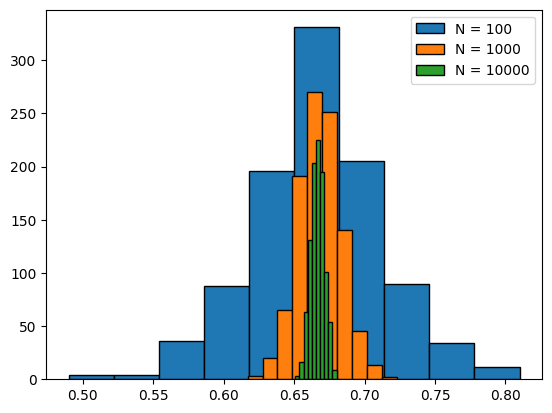

In [4]:
values1 = n1(100,f1,1)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n1(1000,f1,1)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n1(10000,f1,1)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

### $\int_{0}^{1} e^x$

N = 100   ->    1.7223849149665094        erro: 0.004129669660639492
N = 1000   ->    1.717212024646945        erro: 0.0013346945324468143
N = 10000   ->    1.7182210508616702        erro: 0.00043194950318910496


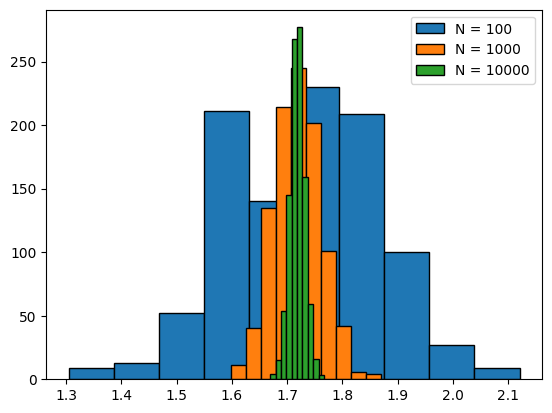

In [5]:
values1 = n1(100,f2,1)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n1(1000,f2,1)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n1(10000,f2,1)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

### $\int_{0}^{\pi} sin^2(x)$

N = 100   ->    1.5703380960708122        erro: 0.004912967513051608
N = 1000   ->    1.570830142268937        erro: 0.0015946119670045221
N = 10000   ->    1.5708025712144498        erro: 0.000512417152041155


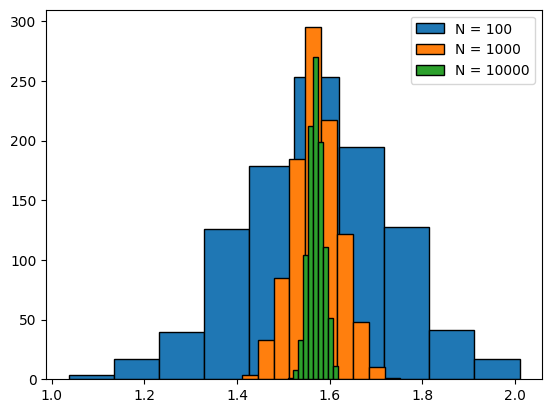

In [6]:
values1 = n1(100,f3,pi)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n1(1000,f3,pi)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n1(10000,f3,pi)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

## Metodo 2

In [7]:
def metodo2(a1, a2, f, n):
  x = [random.uniform(a1,a2) for _ in range(n)]
  sum = 0

  for i in range(n):
    sum = sum + f(x[i])

  return (a2 - a1)/n * sum

def n2(n,f,a2):
  sum = 0
  arr = []
  for i in range(1000):
    area = metodo2(0,a2,f,n)
    arr.append(area)
    sum = sum + area
  err = erro(arr)
  print('N = ' + str(n) + '   ->    ' + str(sum/1000) + '        erro: ' + str(err))
  return arr

### $\int_{0}^{1} (1-x)^2$

N = 100   ->    0.6690502087108882        erro: 0.0009184802035840973
N = 1000   ->    0.6665662857248239        erro: 0.00028722166802558146
N = 10000   ->    0.6667118986708723        erro: 9.231960058821689e-05


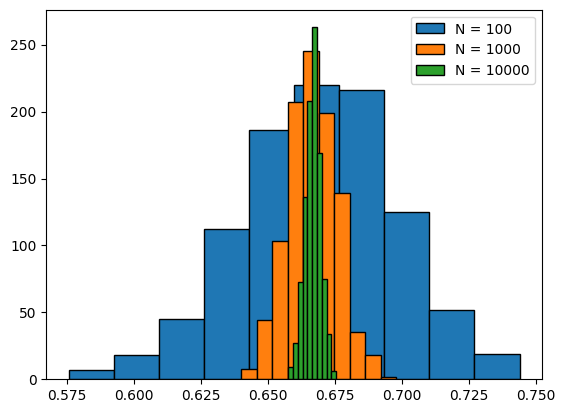

In [8]:
values1 = n2(100,f1,1)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n2(1000,f1,1)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n2(10000,f1,1)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

### $\int_{0}^{1} e^x$

N = 100   ->    1.719160933386216        erro: 0.0015794920961320538
N = 1000   ->    1.7183794571405655        erro: 0.00048351513166471576
N = 10000   ->    1.7183926984875744        erro: 0.00015883928963591852


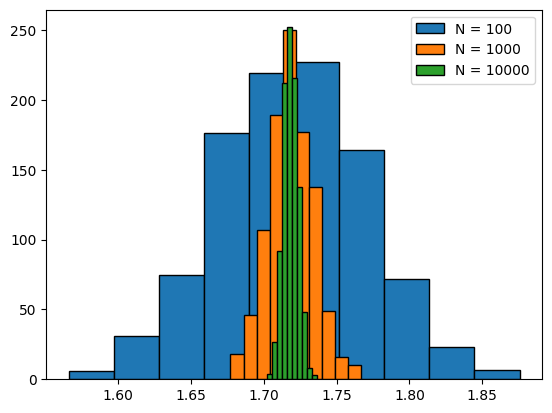

In [9]:
values1 = n2(100,f2,1)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n2(1000,f2,1)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n2(10000,f2,1)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

### $\int_{0}^{\pi} sin^2(x)$

N = 100   ->    1.5724109835073958        erro: 0.0034011458512660762
N = 1000   ->    1.5717815823683328        erro: 0.001104833923886965
N = 10000   ->    1.5709517222747715        erro: 0.00035881289301185323


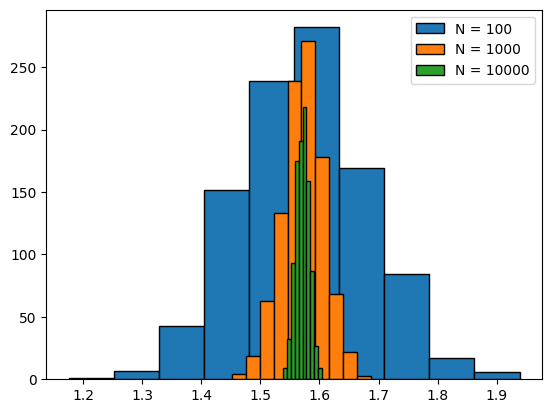

In [10]:
values1 = n2(100,f3,pi)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = n2(1000,f3,pi)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = n2(10000,f3,pi)
plt.hist(values3, edgecolor='k', label="N = 10000")

plt.legend()
plt.show()

##Análise dos Métodos 1 e 2

A partir da análise dos resultados das integrais propostas e dos erros calculados, podemos perceber que o N (quantidade de pontos) é inversamente proporcional ao erro. Ou seja, quanto maior o número de pontos aleátorios usados mais preciso é o resultado. No histograma isso pode ser observado com a redução do intervalo dos resultados à medida que o número de pontos analisados aumenta. No que tange a diferença entre os métodos, foi perceptível que o Método 2 tem uma precisão maior que o Método 1 quando utilizado o mesmo número de pontos aleatórios. Sendo assim, o Método 2 alcança uma precisão similar com um custo computacional menor quando comparado ao Método 1.

## Integrais múltiplas


### $\int_{0}^{1} ... \int_{0}^{1} = \frac{1}{((x{1} + x_{2})x_{3} + (y_{1}+y_{2})y_{3}) + (z_{1}+z_{2})z_{3})} dx_{1}dy_{1}dz_{1}dx_{2}dy_{2}dz_{2}dx_{3}dy_{3}dz_{3}$ 

In [11]:
def integrais_multiplas(n):

  x1 = [random.uniform(0,1) for _ in range(n)]
  x2 = [random.uniform(0,1) for _ in range(n)]
  x3 = [random.uniform(0,1) for _ in range(n)]
  y1 = [random.uniform(0,1) for _ in range(n)]
  y2 = [random.uniform(0,1) for _ in range(n)]
  y3 = [random.uniform(0,1) for _ in range(n)]
  z1 = [random.uniform(0,1) for _ in range(n)]
  z2 = [random.uniform(0,1) for _ in range(n)]
  z3 = [random.uniform(0,1) for _ in range(n)]

  sum = 0
  for i in range(n):
    sum = sum + f4(x1[i],x2[i],x3[i],y1[i],y2[i],y3[i],z1[i],z2[i],z3[i])

  return sum/n

def nInt(n,f,a2):
  sum = 0
  arr = []
  for i in range(1000):
    area = integrais_multiplas(n)
    arr.append(area)
    sum = sum + area
  err = erro(arr)
  print('N = ' + str(n) + '   ->    ' + str(sum/1000) + '        erro: ' + str(err))
  return arr



N = 100   ->    0.8647043115174095        erro: 0.002101145764503469
N = 1000   ->    0.8621986096881352        erro: 0.0006763825212513911
N = 10000   ->    0.8627486250257004        erro: 0.00021970513913722856
N = 100000   ->    0.8628229889599414        erro: 7.069751352676209e-05
N = 1000000   ->    0.8628492733531492        erro: 2.2055655786542797e-05


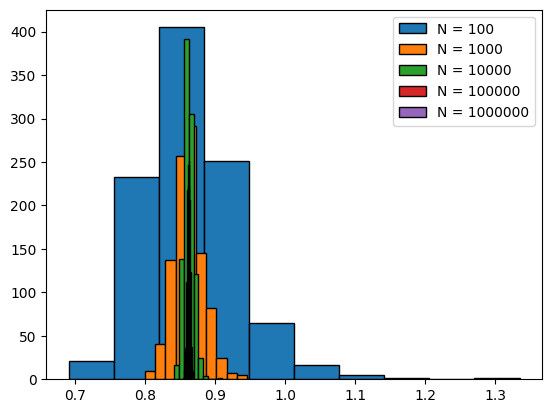

In [12]:
values1 = nInt(100,f1,1)
plt.hist(values1, edgecolor='k', label="N = 100")

values2 = nInt(1000,f1,1)
plt.hist(values2, edgecolor='k', label="N = 1000")

values3 = nInt(10000,f1,1)
plt.hist(values3, edgecolor='k', label="N = 10000")

values4 = nInt(100000,f1,1)
plt.hist(values4, edgecolor='k', label="N = 100000")

values5 = nInt(1000000,f1,1)
plt.hist(values5, edgecolor='k', label="N = 1000000")

plt.legend()
plt.show()

##Resultado Integrais Múltiplas

Resultado encontrado pelo grupo:
N = 1000000   ->    0.862838327685736        erro: 2.2212741343834028e-05